<a href="https://colab.research.google.com/github/duonghiepit/customer-churn-predict/blob/main/Customer_Churn_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.Unzip file

In [ ]:
import os

%cd /content/drive/MyDrive/MCI DA Test

!unzip da_test.zip

/content/drive/MyDrive/MCI DA Test
Archive:  da_test.zip
  inflating: 20231102_EntranceTest_DAInternMCI.docx  
  inflating: ChurnRate.zip           


In [ ]:
!unzip ChurnRate.zip

Archive:  ChurnRate.zip
  inflating: churn-bigml-20.csv      
  inflating: churn-bigml-80.csv      


In [1]:
%cd /content/drive/MyDrive/MCI DA Test

/content/drive/MyDrive/MCI DA Test


In [37]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


## Import Library

In [356]:
import numpy as np                    # linear algebra
import pandas as pd                   # data processing, CSV file I/O
import seaborn as sns                 # for creating plots
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick     # for specifying the axes tick format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

#1.EDA

**Dự đoán tỷ lệ khách hàng rời bỏ** là một khía cạnh quan trọng trong quản lý kinh doanh, đặc biệt đối với các ngành như viễn thông, nhà cung cấp dịch vụ internet, tập đoàn bảo hiểm và dịch vụ giám sát cảnh báo. Nó liên quan đến việc hiểu và giải quyết tình trạng mất khách hay khách hàng.

Đối với các doanh nghiệp trong lĩnh vực này, việc đo lường mức độ tiêu hao của khách hàng là một thước đo kinh doanh quan trọng. Điều này là do việc giữ chân 1 khách hàng hiện tại sẽ tiết kiệm chi phí hơn đáng kể so với việc có 1 khách hàng mới. Do đó, những công ty này thường có các chi nhanh dịch vụ khách hàng chuyên thu hút những khách hàng đang cân nhắc việc rời đi. Điều này là do giá trị lâu dài của những khách hàng cũ lớn hơn rất nhiều so với những khách hàng mới có được.


Để giải quyết tình trạng khách hàng rời bỏ, các phân tích dự đoán sẽ được áp dụng, các mô hình dự đoán tỷ lệ rời bỏ để đánh giá khả năng khách hàng rời đi. Những mô hình này ưu tiên 1 danh sách mẫu những khách hàng có khả năng sẽ rời bỏ, cho phép các doanh nghiệp tập trung nỗ lực giữ chân khách hàng vào những người có nguy cơ rời bỏ cao nhất.

**Topic: Customer churn prediction** is a critical aspect of business management, particularly for industries like telecommunications, internet service providers, pay TV companies, insurance firms, and alarm monitoring services. It involves understanding and addressing customer attrition, which refers to the loss of clients or customers.

For businesses in these sectors, measuring customer attrition is a vital business metric. This is because retaining an existing customer is significantly more cost-effective than acquiring a new one. As a result, these companies often have customer service branches dedicated to re-engaging customers who are considering leaving. This is because the long-term value of recovered customers far outweighs that of newly acquired ones.

**To address customer churn, predictive analytics comes into play**, churn prediction models to assess the likelihood of customers leaving. These models prioritize a small list of potential defectors, enabling businesses to concentrate their customer retention efforts on those who are most at risk of churning.


## Display data

In [357]:
cust_data = pd.read_csv("churn-bigml-80.csv")
cust_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [358]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [359]:
cust_data['Area code'] = cust_data['Area code'].astype('object')

In [360]:
cust_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [361]:
cust_data.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In [362]:
object_cols = [f for f in cust_data.columns if cust_data[f].dtype == "O"]
object_cols

['State', 'Area code', 'International plan', 'Voice mail plan']

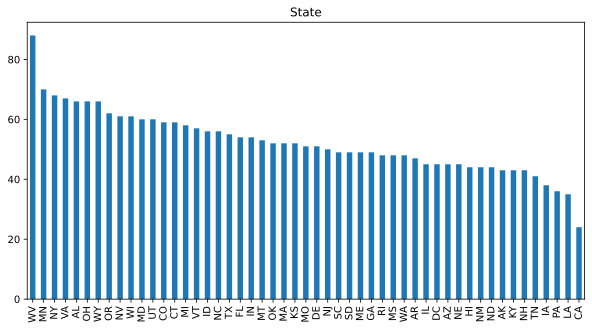

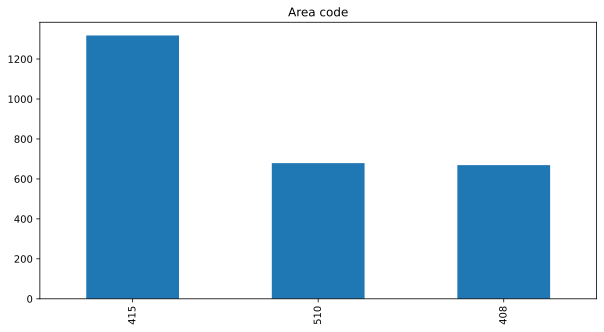

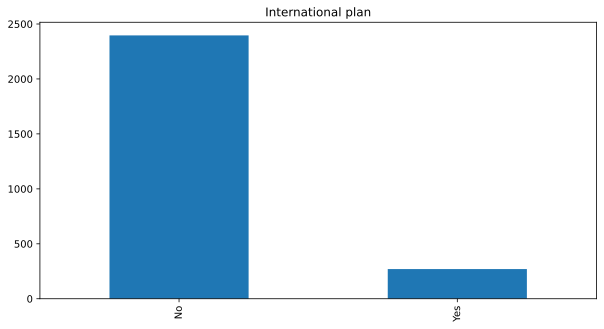

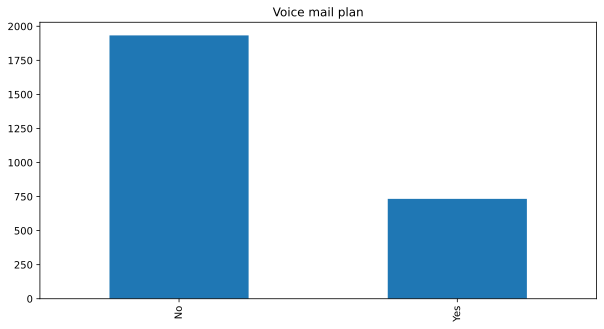

In [363]:
for col in object_cols:
    cust_data[col].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(col)
    plt.show()

In [364]:
numeric_cols = [f for f in cust_data.columns if cust_data[f].dtype != "O"][:-1]
print(numeric_cols)
len(numeric_cols)

['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


15

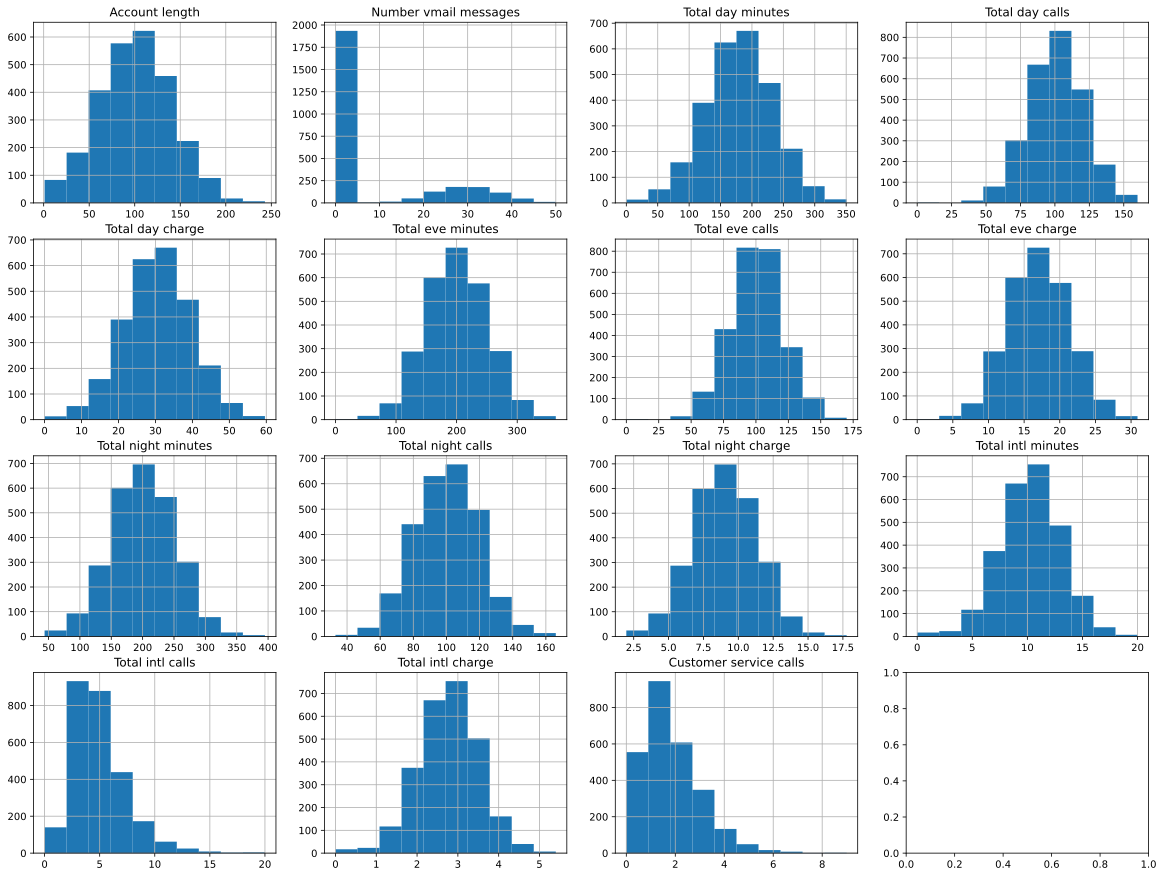

In [365]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    cust_data[col].hist(bins=10, ax=axes[i // 4][i % 4])

    axes[i // 4][i % 4].set_title(col)

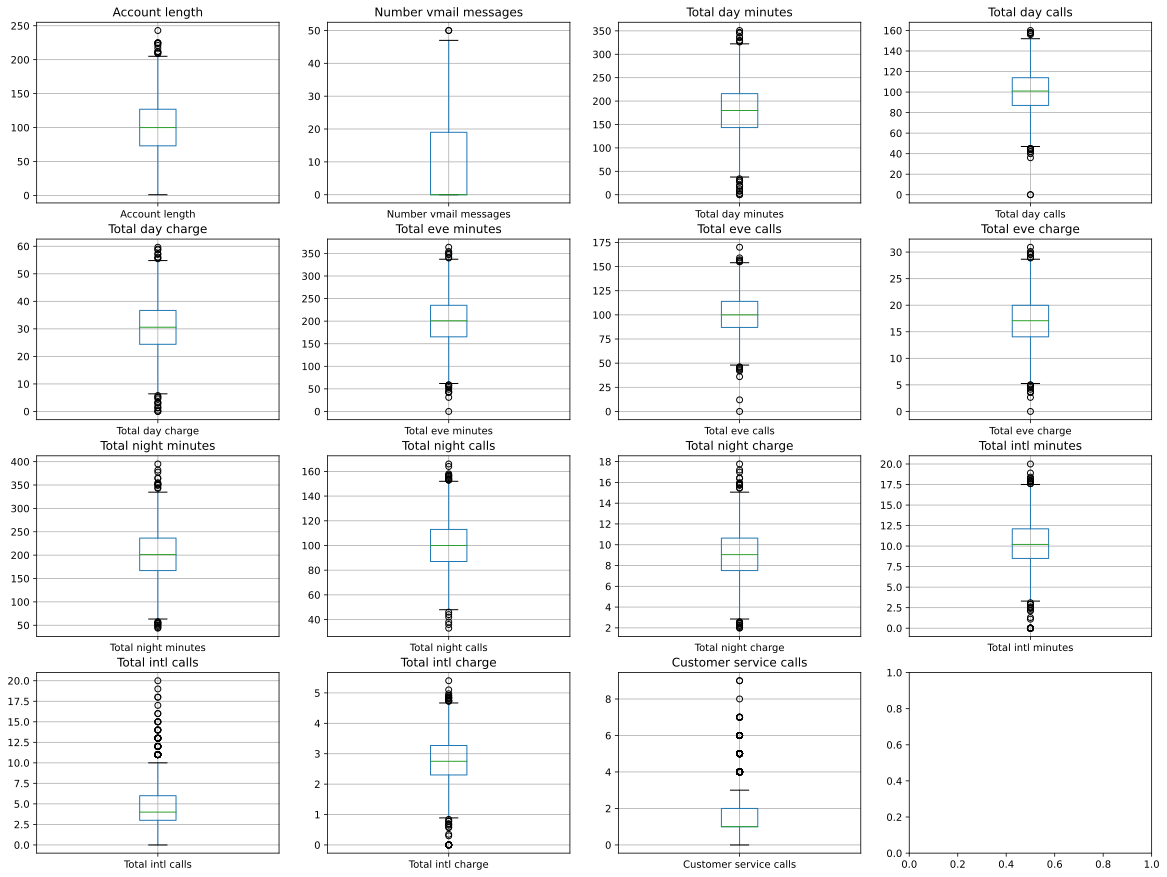

In [366]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    cust_data.boxplot(ax=axes[i // 4][i % 4], column=[col])

    axes[i // 4][i % 4].set_title(col)

## Check on various statistical charachteristics of numerical features

In [367]:
cust_data.describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Include parameter for statistics on non-numerical features

In [368]:
cust_data.describe(include=['object','bool'])

,State,Area code,International plan,Voice mail plan,Churn
count,2666,2666,2666,2666,2666
unique,51,3,2,2,2
top,WV,415,No,No,False
freq,88,1318,2396,1933,2278


## The distribution and proportion in Churn column

In [369]:
cust_data["Churn"].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [370]:
cust_data["Churn"].value_counts(normalize=True)

False    0.854464
True     0.145536
Name: Churn, dtype: float64

## Group

In [371]:
columns_to_show = ['Total day minutes', 'Total eve minutes',
                   'Total night minutes']

cust_data.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                             \
                  count        mean        std  min     50%    max   
Churn                                                                
False            2278.0  175.104346  50.105334  0.0  177.90  313.8   
True              388.0  205.181186  68.490213  0.0  214.95  350.8   

      Total eve minutes                                              \
                  count        mean        std   min     50%    max   
Churn                                                                 
False            2278.0  198.853380  50.818954   0.0  199.55  354.2   
True              388.0  209.385309  50.863718  70.9  209.00  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2278.0  200.464091  51.284496  43.7  200.00  395.0  
True                388.0  205.307216  47.565157  47.4  204.95  354.9

To see distribution of our observation, we can build a contingency table using the crosstab method

In [372]:
pd.crosstab(cust_data['Churn'], cust_data['International plan'])

International plan,No,Yes
Churn,,
False,2126,152
True,270,118


In [373]:
pd.crosstab(cust_data['Churn'], cust_data['Voice mail plan'])

Voice mail plan,No,Yes
Churn,,
False,1610,668
True,323,65


#2.Visualize Data

In [374]:
%config InlineBackend.figure_format = 'svg'

## Churn by State

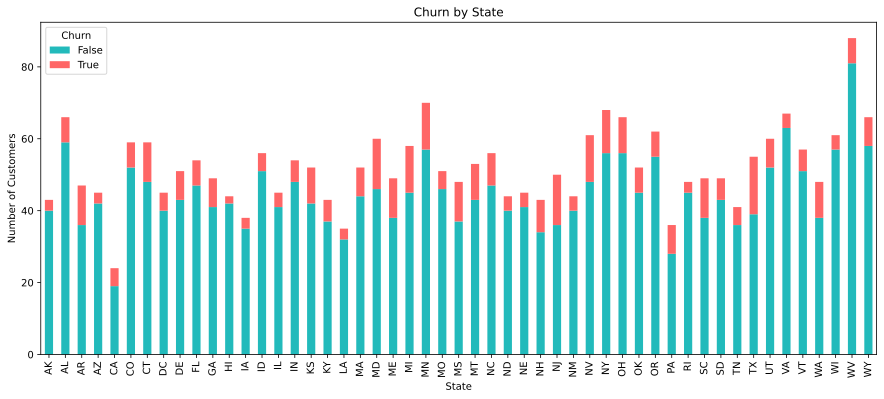

In [375]:
colors=['#22BABB', '#ff6666']
df_state = cust_data.groupby('State')['Churn'].value_counts()

df_state_unstack = df_state.unstack()

df_state_unstack.plot(kind='bar', stacked=True, color=colors, figsize=(15, 6))

# Add title
plt.title('Churn by State')

# Add y-label
plt.ylabel('Number of Customers')

plt.show()

## Churn by Type of Plan and Area code

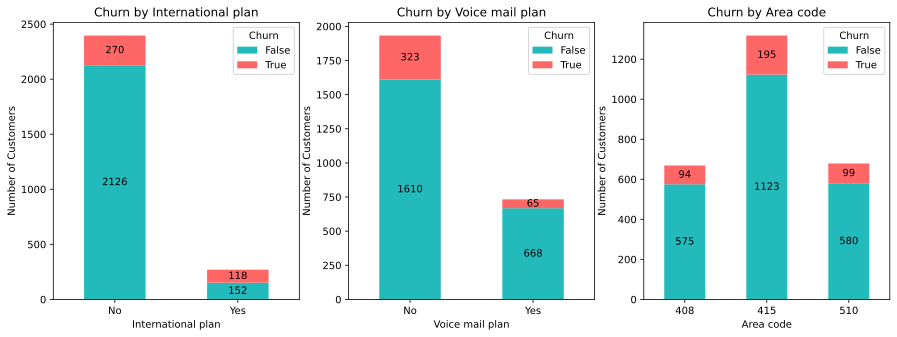

In [376]:
colors=['#22BABB', '#ff6666']
columns = ['International plan', 'Voice mail plan', 'Area code']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(columns):
    df = cust_data.groupby(column)['Churn'].value_counts().unstack()

    df.plot(kind='bar', stacked=True, color=colors, ax=axes[i])

    axes[i].set_title(f"Churn by {column}")
    axes[i].set_ylabel('Number of Customers')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

    for c in axes[i].containers:
        values = [str(round(v.get_height())) for v in c]
        axes[i].bar_label(c,
                          label_type='center',
                          labels = values,
                          size = 10)

## Churn by Calling Pattern

In [377]:
def round_to_nearest_ten(value):
    remainder = value % 4
    if remainder <= 2:
        return value - remainder
    else:
        return value + (4 - remainder)

In [378]:
round_to_nearest_ten(17)

16

In [379]:
cust_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


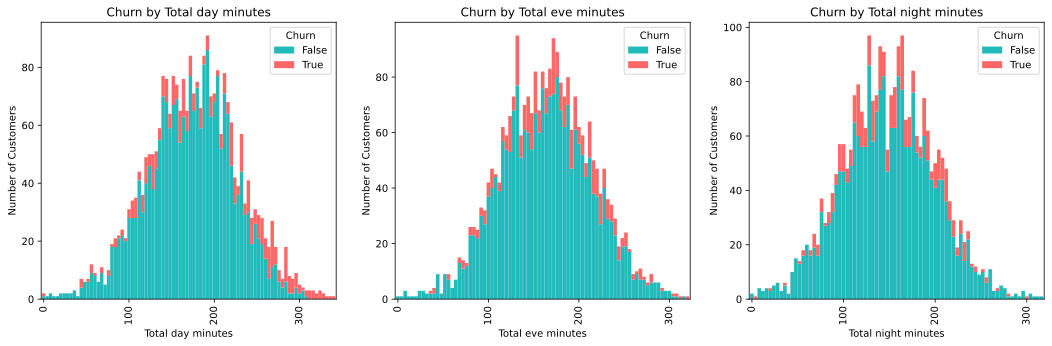

In [380]:
colors=['#22BABB', '#ff6666']
columns = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cust_data_copy = cust_data.copy()
for i, column in enumerate(columns):
    cust_data_copy['Round'] = cust_data_copy[column].apply(round_to_nearest_ten)
    df = cust_data_copy.groupby('Round')['Churn'].value_counts().unstack()
    df.plot(kind='bar', stacked=True, color=colors, ax=axes[i], width=1, grid=False)

    axes[i].set_title(f"Churn by {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Number of Customers')
    axes[i].set_xticks((0, 25, 50, 75), ('0', '100', '200', '300'))

    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, fontsize=5)


#3.Preprocessing Dataset

In [381]:
dataset = cust_data.copy()
dataset['Churn'] = dataset['Churn'].astype('object')
dataset['Area code'] = dataset['Area code'].astype('object')
test = pd.read_csv("churn-bigml-20.csv")
y_final_test = test['Churn']
test.drop('Churn', axis=1, inplace=True)
test['Area code'] = test['Area code'].astype('object')

In [382]:
he = ce.HashingEncoder(cols='State')
dataset_hash = he.fit_transform(dataset)
test_hash = he.fit_transform(test)

In [383]:
dataset_hash_dummy = pd.get_dummies(dataset_hash, drop_first=True)
dataset_hash_dummy.head()

<ipython-input-383-934e5defd2d4>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dataset_hash_dummy = pd.get_dummies(dataset_hash, drop_first=True)


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Number vmail messages,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes,Churn_True
0,0,1,0,0,0,0,0,0,128,25,...,11.01,10.0,3,2.70,1,1,0,0,1,0
1,0,0,0,0,1,0,0,0,107,26,...,11.45,13.7,3,3.70,1,1,0,0,1,0
2,0,1,0,0,0,0,0,0,137,0,...,7.32,12.2,5,3.29,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,84,0,...,8.86,6.6,7,1.78,2,0,0,1,0,0
4,0,0,0,0,1,0,0,0,75,0,...,8.41,10.1,3,2.73,3,1,0,1,0,0


In [384]:
test_hash_dummy = pd.get_dummies(test_hash, drop_first=True)
test_hash_dummy.head()

<ipython-input-384-a4699b162ccb>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  test_hash_dummy = pd.get_dummies(test_hash, drop_first=True)


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Number vmail messages,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0,1,0,0,0,0,0,0,117,0,...,90,9.71,8.7,4,2.35,1,0,0,0,0
1,0,0,0,1,0,0,0,0,65,0,...,111,9.40,12.7,6,3.43,4,1,0,0,0
2,1,0,0,0,0,0,0,0,161,0,...,128,7.23,5.4,9,1.46,4,1,0,0,0
3,0,0,0,0,0,1,0,0,111,0,...,105,8.53,7.7,6,2.08,2,1,0,0,0
4,0,0,0,0,0,0,1,0,49,0,...,90,8.04,11.1,1,3.00,1,0,1,0,0


In [385]:
corr = dataset_hash_dummy.corr()
corr.style.background_gradient(cmap='cividis', vmin=-1, vmax=1).set_precision(2)

<ipython-input-385-0bc635997562>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='cividis', vmin=-1, vmax=1).set_precision(2)


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes,Churn_True
col_0,1.00,-0.20,-0.12,-0.16,-0.20,-0.11,-0.20,-0.14,0.02,0.03,0.01,0.00,0.01,0.01,0.01,0.01,0.01,-0.04,0.01,-0.02,-0.01,-0.02,0.01,-0.01,-0.02,0.00,0.03,-0.04
col_1,-0.20,1.00,-0.12,-0.16,-0.20,-0.11,-0.19,-0.14,0.00,0.00,0.06,0.00,0.06,-0.02,0.01,-0.02,-0.02,0.01,-0.02,0.03,0.01,0.03,0.02,0.02,-0.03,-0.00,-0.00,0.05
col_2,-0.12,-0.12,1.00,-0.10,-0.12,-0.07,-0.12,-0.09,-0.01,-0.02,-0.03,-0.01,-0.03,0.03,-0.04,0.03,-0.00,0.04,-0.00,-0.01,0.01,-0.01,-0.02,-0.02,0.01,-0.02,-0.01,-0.00
col_3,-0.16,-0.16,-0.10,1.00,-0.16,-0.09,-0.16,-0.12,0.02,-0.01,-0.00,0.02,-0.00,0.03,0.02,0.03,0.01,0.00,0.01,0.00,-0.02,0.00,0.02,-0.00,0.03,0.03,-0.01,-0.00
col_4,-0.20,-0.20,-0.12,-0.16,1.00,-0.11,-0.19,-0.14,0.00,0.00,0.02,-0.00,0.02,0.02,0.02,0.02,0.04,0.01,0.04,0.01,-0.02,0.01,-0.02,-0.01,0.00,0.02,0.01,0.02
col_5,-0.11,-0.11,-0.07,-0.09,-0.11,1.00,-0.11,-0.08,-0.03,-0.00,-0.04,0.01,-0.04,0.01,-0.01,0.01,-0.01,0.01,-0.01,-0.02,-0.02,-0.02,-0.01,0.02,-0.01,-0.01,-0.00,0.05
col_6,-0.20,-0.19,-0.12,-0.16,-0.19,-0.11,1.00,-0.14,-0.01,-0.00,-0.03,-0.01,-0.03,-0.08,-0.03,-0.08,-0.02,0.01,-0.02,0.01,0.03,0.01,0.01,0.03,-0.01,-0.04,-0.01,-0.05
col_7,-0.14,-0.14,-0.09,-0.12,-0.14,-0.08,-0.14,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.03,-0.01,-0.03,-0.02,-0.00,-0.02,-0.02,-0.02,0.04,0.02,-0.01,-0.01
Account length,0.02,0.00,-0.01,0.02,0.00,-0.03,-0.01,-0.01,1.00,-0.00,0.00,0.04,0.00,-0.02,0.02,-0.02,-0.01,-0.02,-0.01,0.01,0.02,0.01,0.00,0.00,-0.01,0.02,0.00,0.02
Number vmail messages,0.03,0.00,-0.02,-0.01,0.00,-0.00,-0.00,-0.01,-0.00,1.00,0.02,-0.01,0.02,0.01,0.01,0.01,-0.00,0.01,-0.00,-0.00,0.03,-0.00,-0.02,0.01,-0.00,0.01,0.96,-0.09


In [386]:
# Remove high correlation columns
dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["Voice mail plan_Yes", "Total day charge", "Total eve charge", "Total night charge", "Total intl charge"])

In [387]:
# Remove high correlation columns in test dataset
test_dummy_drop_corr = test_hash_dummy.drop(columns=["Voice mail plan_Yes", "Total day charge", "Total eve charge", "Total night charge", "Total intl charge"])

## Using Binary Classification (Logistics)

In [388]:
dataset_hash_dummy_drop_corr.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Area code_415',
       'Area code_510', 'International plan_Yes', 'Churn_True'],
      dtype='object')

In [389]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["Churn_True"],axis=1)
y = dataset_hash_dummy_drop_corr['Churn_True']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

#Scale

scale_columns = ['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls']



scaler = MinMaxScaler()
scaler.fit(X_train_resample[scale_columns])
X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

In [390]:
# Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

# In ra du lieu
print(classification_report( y_test, y_pred))

confusion_matrix(y_pred, y_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       455
           1       0.42      0.27      0.33        79

    accuracy                           0.84       534
   macro avg       0.65      0.60      0.62       534
weighted avg       0.81      0.84      0.82       534



array([[426,  58],
       [ 29,  21]])

## Using Random Forest

In [392]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["Churn_True"],axis=1)
y = dataset_hash_dummy_drop_corr['Churn_True']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [393]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(accuracy_score(y_test, prediction_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8820224719101124


In [394]:
print(classification_report(y_test, prediction_test))
confusion_matrix(prediction_test, y_test)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       455
           1       1.00      0.20      0.34        79

    accuracy                           0.88       534
   macro avg       0.94      0.60      0.64       534
weighted avg       0.90      0.88      0.85       534



array([[455,  63],
       [  0,  16]])

<Axes: >

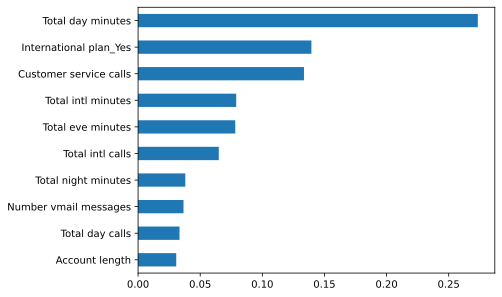

In [395]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Using Support Vecor Machine (SVM)

In [396]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["Churn_True"],axis=1)
y = dataset_hash_dummy_drop_corr['Churn_True']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [397]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
preds = svm.predict(X_test)
accuracy_score(y_test, preds)

0.8539325842696629

In [398]:
print(classification_report(y_test, preds))
confusion_matrix(preds, y_test)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       455
           1       1.00      0.01      0.02        79

    accuracy                           0.85       534
   macro avg       0.93      0.51      0.47       534
weighted avg       0.88      0.85      0.79       534



array([[455,  78],
       [  0,   1]])

## Using ADABoost

In [399]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["Churn_True"],axis=1)
y = dataset_hash_dummy_drop_corr['Churn_True']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [400]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.8558052434456929

In [401]:
print(classification_report(y_test, preds))
confusion_matrix(preds, y_test)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       455
           1       0.52      0.30      0.38        79

    accuracy                           0.86       534
   macro avg       0.70      0.63      0.65       534
weighted avg       0.83      0.86      0.84       534



array([[433,  55],
       [ 22,  24]])

## Using XGBoost

In [402]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["Churn_True"],axis=1)
y = dataset_hash_dummy_drop_corr['Churn_True']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [403]:
# XGBoost

import xgboost as xgb

model = xgb.XGBClassifier(random_state=42, n_estimators=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       455
           1       0.94      0.77      0.85        79

    accuracy                           0.96       534
   macro avg       0.95      0.88      0.91       534
weighted avg       0.96      0.96      0.96       534



array([[451,   4],
       [ 18,  61]])

In [404]:
test_dummy_drop_corr

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Number vmail messages,...,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Area code_415,Area code_510,International plan_Yes
0,0,1,0,0,0,0,0,0,117,0,...,351.6,80,215.8,90,8.7,4,1,0,0,0
1,0,0,0,1,0,0,0,0,65,0,...,228.5,83,208.8,111,12.7,6,4,1,0,0
2,1,0,0,0,0,0,0,0,161,0,...,317.8,97,160.6,128,5.4,9,4,1,0,0
3,0,0,0,0,0,1,0,0,111,0,...,137.3,102,189.6,105,7.7,6,2,1,0,0
4,0,0,0,0,0,0,1,0,49,0,...,215.1,109,178.7,90,11.1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,1,114,26,...,155.7,125,247.6,94,11.5,7,2,1,0,0
663,0,1,0,0,0,0,0,0,106,29,...,203.9,131,229.5,73,8.1,3,1,0,0,0
664,0,0,0,0,1,0,0,0,60,0,...,85.0,110,210.1,134,13.2,8,3,1,0,0
665,0,0,0,0,0,0,1,0,159,0,...,197.7,105,193.7,82,11.6,4,1,1,0,0


In [405]:
y_pred_submit = model.predict(test_dummy_drop_corr)
y_pred_submit

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [406]:
y_final_test1 = [1 if y_final_test[i] else 0 for i in range(len(y_final_test))]

In [407]:
def compare_lists(list1, list2):
  matches = 0
  total = len(list1)

  for i in range(len(list1)):
    if list1[i] == list2[i]:
      matches += 1

  # Calculate the percentage of similarity.
  similarity = (matches / total) * 100

  return similarity

similarity = compare_lists(y_pred_submit, y_final_test1)

print(f"Accuracy {similarity:.3f}%.")

Accuracy 94.753%.
